# Workbook One

## Question 1: Precision of floating point arithmetic

Consider the recursion relation

$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

1. Calculate the first 80 terms in this sequence using single precision floating point arithmetic (Float32 in Julia). Plot the resulting sequence on a lin-log plot.

2. Repeat the calculation using double precision floating point arithmetic (Float64 in Julia) and add the results to to your plot.

3. Find the **general** solution of the recursion relation analytically (it should contain two arbitrary constants). Hint: start from the ansatz $a_n = x^n$ and find the the allowed values of $x$.

4. Find the solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

5. Find the solution that satisfies the perturbed initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. Use the answer to explain your numerical results.

6. Julia supports arbitrary precision floating point arithmetic using the BigFloat type (see https://docs.julialang.org/en/latest/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1). Try to reproduce the exact solution for the first 80 terms in the sequence using 128 bit precision and show the results on your plot.

In [5]:
using PyPlot
rc("font", family="sans-serif")
include("functions1.jl");

In [6]:
# First 80 terms of the sequence using Float32, Float64, BigFloat
seq32=q1sequence(Float32,80)
seq64=q1sequence(Float64,80)
seq128=q1sequence(BigFloat,80);

$\text{General solution of the recursion relation and the solution that satisfies the initial conditions:}$

$\text{Let } a^n = {\lambda}^{n}$


${{a}_{n+1}}=2{{a}_{n}}-\frac{8}{9}{{a}_{n-1}}\Rightarrow {{\lambda }^{n+1}}=2{{\lambda }^{n}}-\frac{8}{9}{{\lambda }^{n-1}}$


${{\lambda }^{n+1}}-2{{\lambda }^{n}}+\frac{8}{9}{{\lambda }^{n-1}}=({{\lambda }^{2}}-2\lambda +\frac{8}{9}){{\lambda }^{n-1}}=0$


$\Rightarrow \lambda =\frac{4}{3},\frac{2}{3}$

$\Rightarrow {{a}_{n}}={{c}_{1}}{{(\frac{4}{3})}^{n}}+{{c}_{2}}{{(\frac{2}{3})}^{n}}$

$\Rightarrow {{a}_{1}}=\frac{4}{3}{{c}_{1}}+\frac{2}{3}{{{c}}_{2}},\text{ }{{a}_{2}}=\frac{16}{9}{{c}_{1}}+\frac{4}{9}{{{c}}_{2}}$

$\text{Applying the initial condtions of }{{a}_{1}}=1,\text{ }{{a}_{2}}=\frac{2}{3}\text{, we have:}$

${{c}_{1}}=0,\text{ }{{c}_{2}}=\frac{3}{2}.$

$\Rightarrow {{a}_{n}}={{(\frac{2}{3})}^{n-1}},\text{ }n=1,2,... \text{ is the exact solution.}$ 



$\text{Consider the perturbed initial conditions:  }{{a}_{1}}=1,\text{ }{{a}_{2}}=\frac{2}{3}+\varepsilon$
 
$\text{From before we have: }{{a}_{1}}=\frac{4}{3}{{\text{c}}_{1}}+\frac{2}{3}{{\text{c}}_{2}},\text{ }{{a}_{2}}=\frac{16}{9}{{\text{c}}_{1}}+\frac{4}{9}{{\text{c}}_{2}}.$
 
$\text{Applying the initial conditions }{{a}_{1}}=1,\text{ }{{a}_{2}}=\frac{2}{3}+\varepsilon ,\text{ we have: } {{\text{c}}_{1}}=\frac{9}{8}\varepsilon ,\text{ }{{\text{c}}_{2}}=\frac{3}{2}-\frac{9}{4}\varepsilon$
 
$\Rightarrow {{a}_{n}}=\frac{9}{8}\varepsilon {{(\frac{4}{3})}^{n}}+(\frac{3}{2}-\frac{9}{4}\varepsilon ){{(\frac{2}{3})}^{n}}$
 
$\Rightarrow {{a}_{n}}={{(\frac{2}{3})}^{n-1}}+\varepsilon (2{{(\frac{4}{3})}^{n-2}}-{{(\frac{2}{3})}^{n-2}})$
 
$\text{The perturbed initial conditions creates an additional term in the solution.}$
$\text{This new term is positive as }\varepsilon >0\text{ and }(2{{(\frac{4}{3})}^{n-2}}-{{(\frac{2}{3})}^{n-2}})>0.$

$\text{Thus, as n gets large, the additional term gets larger and larger and causes the sequence}$
$\text{values to diverge from the exact solution (as shown in the plots in Figure 1).}$


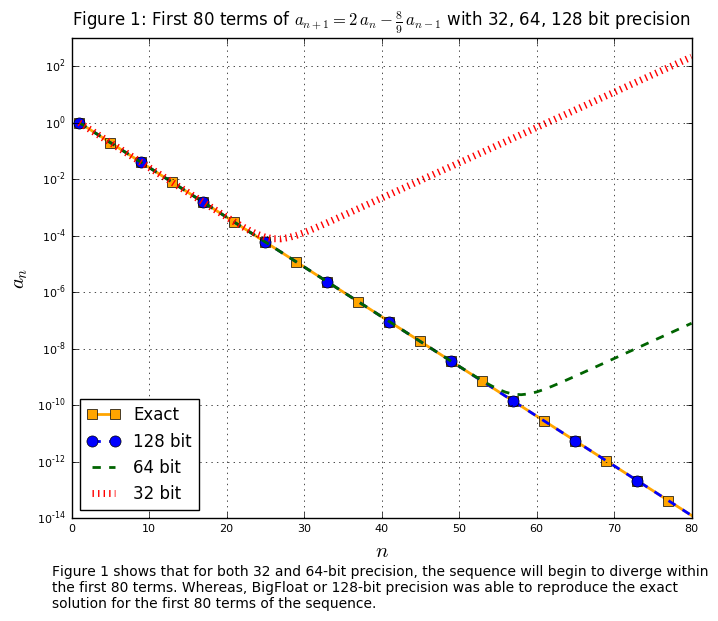

In [7]:
x=1:1:80
y=1:1:80
exact=(2/3).^(y-1)
fig,ax=PyPlot.subplots(1,1)
txt = "Figure 1 shows that for both 32 and 64-bit precision, the sequence will begin to diverge within\nthe first 80 terms. Whereas, BigFloat or 128-bit precision was able to reproduce the exact\nsolution for the first 80 terms of the sequence."
fig[:text](0.1,-0.05,txt,fontsize=10)
semilogy(x,exact,label="Exact",marker="s",markevery=4,linewidth=2.0,linestyle="-",color="orange",markersize=7)
semilogy(x,seq128,label="128 bit",marker="o",markevery=8,linewidth=2.0,linestyle="--",markersize=8)
semilogy(x,seq64,label="64 bit",linewidth=2.0,color="darkgreen",linestyle="--")
semilogy(x,seq32,label="32 bit",linewidth=5.0,linestyle=":",color="red")
legend(loc=3,fontsize=12)
title(L"Figure 1: First 80 terms of $a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$ with 32, 64, 128 bit precision",fontsize=12,y=1.01);
grid("on")
ax[:tick_params]("both",labelsize=8) 
ax[:set_xlabel](L"$n$", fontsize=15)
ax[:set_ylabel](L"$a_n$", fontsize=15);

## Question 2: Computational complexity of the mergesort algorithm

**2.1)** Verify that the function mergepresorted(A, B) works as described.

In [8]:
A=[10,20,30,40,50,60,70,80,90,100] # array of 10 elements
B=[5,15,25,35,45,55,65,75,85,95] # array of 10 elements

AB=mergepresorted(A,B)

println("A is an array sorted in ascending order with elements: ", A)
println("B is an array sorted in ascending order with elements: ", B,"\n")
println("The mergepresorted function combines A and B and sorts them in ascending order:\n", AB)

A is an array sorted in ascending order with elements: [10,20,30,40,50,60,70,80,90,100]
B is an array sorted in ascending order with elements: [5,15,25,35,45,55,65,75,85,95]

The mergepresorted function combines A and B and sorts them in ascending order:
[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]


**2.2)**  Write a recursive function that implements the mergesort algorithm for an array of integers whose length, $n$ is a power of 2: $n=2^m$. Verify that it works by generating some arrays of random integers and using your function to sort them.

In [9]:
G=rand(1:100,16)
println("G is a 16 element array of random integers: ",G,"\n")
println("The mergesort function sorts the elements of G in ascending order:\n",mergesort(G))

G is a 16 element array of random integers: [90,76,73,7,11,24,15,60,71,85,20,52,8,9,74,56]

The mergesort function sorts the elements of G in ascending order:
[7,8,9,11,15,20,24,52,56,60,71,73,74,76,85,90]


**2.3)** Explain why the computational complexity, $F(n)$, of your mergesort algorithm satisfies the recursion
 $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$.  


If we assume the computatational complexity of the mergesort algorithm for a list of length $n$ is $F(n)$, then the computational complexity of applying the algorithm to two lists of half the length, $\frac{n}{2}$, is $2F(\frac{n}{2})$. Additionally, there are $n$ steps involved in merging the two lists together. Thus, the computational complexity is  $F(n) = 2\, F(\frac{n}{2}) + n$.

**2.4)** Introduce the new variable p defined by $n = 2^p$ and let $b_p = F(2^p)$. Show that in these variables the above equation takes the form
$b_p = 2 b_{p−1} + 2^p\ \ \ \ $ with initial condition $b_0 = 1$.

$\text{We have }n={{2}^{p}}$, ${{b}_{p}}=F({{2}^{p}})$.

$\begin{align}
  & \Rightarrow F({{2}^{p}})=2F(\frac{{{2}^{p}}}{2})+{{2}^{p}} \\ 
 & \Rightarrow F({{2}^{p}})=2F({{2}^{p-1}})+{{2}^{p}} \\ 
 & \Rightarrow {{b}_{p}}=2{{b}_{p-1}}+{{2}^{p}} \\ 
 & \Rightarrow {{b}_{0}}={{2}^{0}}=1 \\ 
 & \text{Thus, }{{b}_{p}}=2{{b}_{p-1}}+{{2}^{p}},{{b}_{0}}=1. \\ 
\end{align}$


**2.5)** Find the general solution to the associated homogeneous recursion relation (ie without the $2^p$ term).

Let ${{b}_{p}}={{\beta }^{p}}$

$\begin{align}
  & {{b}_{p}}=2{{b}_{p-1}}\Rightarrow {{\beta }^{p}}=2{{\beta }^{p-1}} \\ 
 & {{\beta }^{p}}-2{{\beta }^{p-1}}=0 \\ 
 & (\beta -2){{\beta }^{p-1}}=0 \\ 
 & \beta -2=0\Rightarrow \beta =2 \\ 
 & \Rightarrow {{b}_{p}}=c{{2}^{p}}\text{ is the general solution.} \\ 
\end{align}$ 


**2.6)**  Find a particular solution of the original inhomogenous recursion relation and use the initial condition to determine the constant in the homogenous solution.

${{b}_{p}}-2{{b}_{p-1}}={{2}^{p}}$

$\text{Ansatz for particular solution: }{{b}_{p}}=ap{{2}^{p}}$  
$\begin{align}
  & {{b}_{p}}-2{{b}_{p-1}}={{2}^{p}}\Rightarrow ap{{2}^{p}}-2a(p-1){{2}^{p-1}}={{2}^{p}} \\ 
 & a{{2}^{p}}(p-(p-1))={{2}^{p}} \\ 
 & \Rightarrow a=1 \\ 
 & \Rightarrow {{b}_{p}}=p{{2}^{p}} \text{ is the particular solution.}\\ 
 &  \\ 
\end{align}$

$\begin{align}
  & {{b}_{p}}=c{{2}^{p}}+p{{2}^{p}},{{b}_{0}}=1 \\ 
 & \Rightarrow c{{2}^{0}}+0=1 \\ 
 & \Rightarrow c=1\text{ is the constant in the homogeneous solution.}  \\ 
 & \Rightarrow {{b}_{p}}={{2}^{p}}+p{{2}^{p}}\text{ is the solution.} \\ 
\end{align}$

**2.7)**  Hence show that the computational complexity of the mergesort algorithm is
$F(n) = O(n\, \log n)$.

$\text{Let }{n={{2}^{p}}}$

$\Rightarrow p=\frac{\log n}{\log 2}$

$\Rightarrow {{b}_{p}}={{2}^{p}}+p{{2}^{p}}=n+\frac{\log n}{\log 2}n=n(1+\frac{\log n}{\log 2})$

$\Rightarrow F(n)=O(n\log n)$



**2.8)**  Use Julia's @timed macro to measure the execution time of your mergesort function for arrays of lengths $\{2^i : i =1 : 15\}$. Compare the results to the theoretical expectations.

In [29]:
time_actual=zeros(15)
time_theory=zeros(15)
for i=1:15
    n=2^i
    aray=rand(1:50000,n)
    t=@timed mergesort(aray)
    time_actual[i]=t[2]
    time_theory[i]=(time_actual[1]/(2*log(2)))*n*log(n)
end    

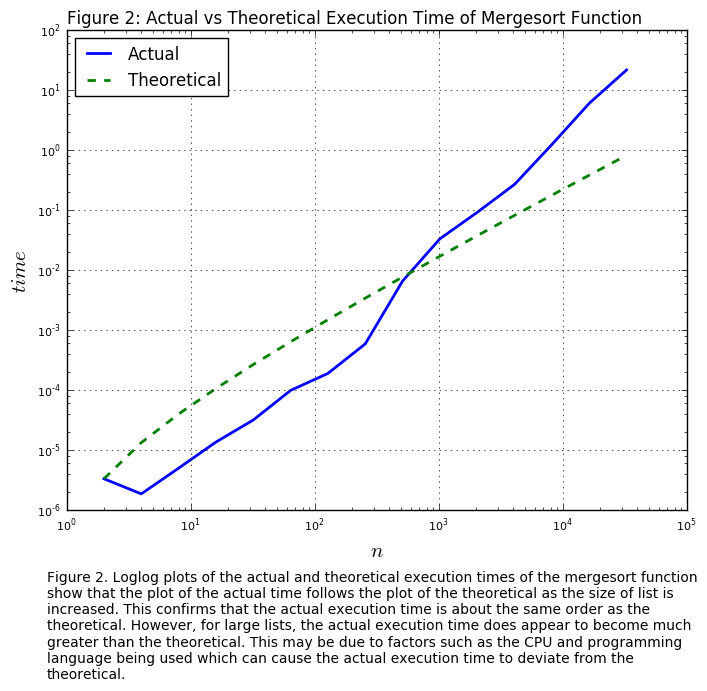

In [40]:
fig,ax=PyPlot.subplots(1,1)
txt="Figure 2. Loglog plots of the actual and theoretical execution times of the mergesort function
show that the plot of the actual time follows the plot of the theoretical as the size of list is
increased. This confirms that the actual execution time is about the same order as the 
theoretical. However, for large lists, the actual execution time does appear to become much 
greater than the theoretical. This may be due to factors such as the CPU and programming 
language being used which can cause the actual execution time to deviate from the 
theoretical."
fig[:text](0.1,-0.18,txt,fontsize=10)
title("Figure 2: Actual vs Theoretical Execution Time of Mergesort Function",fontsize=12,loc="left")
grid("on")
x=linspace(1,15,15)
x2=(2.0).^x
loglog(x2,time_actual,label="Actual",lw=2)
loglog(x2,time_theory,color="red",label="Theoretical",lw=2,color="green",linestyle="--")
legend(fontsize=12,loc=2);
grid("on")
ax[:tick_params]("both",labelsize=8) 
ax[:set_xlabel](L"$n$", fontsize=15)
ax[:set_ylabel](L"$time$", fontsize=15)
#ax[:ticklabel_format](style="sci",axis="x",scilimits=(0,0))
#ax[:set_xscale]("log");